In [28]:
%matplotlib widget
%matplotlib inline

In [29]:
import warnings

warnings.filterwarnings("ignore")

from IPython.display import display

In [30]:
books_lst = ["The Last Wish", "The Sword of Destiny", "Blood of Elves", "Times of Contempt", "Baptism of Fire",
             "The Tower of the Swallow", "The Lady of the Lake", "Something Ends, Something Begins"]
chars_lst = ["Geralt", "Ciri", "Yennefer", "Milva", "Cahir", "Vilgefortz", "Emhyr", "Philippa", "Zoltan", "Dandelion",
             "Jarre", "Triss", "Yarpen", "Nenneke", "Fringilla"]

In [31]:
from ast import literal_eval
from os import path

import pandas as pd

char_apps_df = pd.read_csv(filepath_or_buffer=path.join("csv", "character_appearances.csv"), sep=";", header=0,
                           index_col=0, encoding="utf-8")
chars_df = pd.read_csv(filepath_or_buffer=path.join("csv", "characters.csv"), sep=";", header=0, index_col=0,
                       encoding="utf-8")
chars_df["Parent(s)"] = chars_df["Parent(s)"].apply(lambda s: literal_eval(s) if not pd.isna(s) else {})
chars_df["Child(ren)"] = chars_df["Child(ren)"].apply(lambda s: literal_eval(s) if not pd.isna(s) else {})
sents_df = pd.read_csv(filepath_or_buffer=path.join("csv", "sentences.csv"), sep=";", header=0, index_col=0,
                       encoding="utf-8")
sents_df["Sentence"] = sents_df["Sentence"].apply(lambda s: s.strip())
sents_df["Entities"] = sents_df["Entities"].apply(literal_eval)
sents_df["CharacterEntities"] = sents_df["CharacterEntities"].apply(literal_eval)
filt_sents_df = pd.read_csv(filepath_or_buffer=path.join("csv", "filtered_sentences.csv"), sep=";", header=0,
                            index_col=0, encoding="utf-8")
filt_sents_df["Sentence"] = filt_sents_df["Sentence"].apply(lambda s: s.strip())
filt_sents_df["Entities"] = filt_sents_df["Entities"].apply(literal_eval)
filt_sents_df["CharacterEntities"] = filt_sents_df["CharacterEntities"].apply(literal_eval)

In [32]:
display(sents_df, filt_sents_df)

,Book,Sentence,Entities,CharacterEntities
0,The Last Wish,ï»¿'Does she always devour her victims?',[],[]
1,The Last Wish,Velerad spat vehemently on the straw.,[Velerad],[Velerad]
2,The Last Wish,"'Come on, Geralt, it'll be supper soon.",[Geralt],[Geralt]
3,The Last Wish,Pish!,[],[]
4,The Last Wish,"Devours, takes a bite, leaves aside, it varies...",[],[]
...,...,...,...,...
83400,"Something Ends, Something Begins",Do you have a menagerie here?,[],[]
83401,"Something Ends, Something Begins",No?,[],[]
83402,"Something Ends, Something Begins","Well, you can stuff him and hang him in the ha...",[],[]
83403,"Something Ends, Something Begins","But I tell you, it's one hell of a liar.",[one],[]


,Book,Sentence,Entities,CharacterEntities
1,The Last Wish,Velerad spat vehemently on the straw.,[Velerad],[Velerad]
2,The Last Wish,"'Come on, Geralt, it'll be supper soon.",[Geralt],[Geralt]
6,The Last Wish,"Damned mother's-!' 'Careful, Velerad,' snarled...","[Careful, Velerad, Ostrit]","[Velerad, Ostrit]"
7,The Last Wish,'Say what you want about the striga but do not...,[Adda],[Adda]
10,The Last Wish,Segelin and Ostrit looked at each other.,"[Segelin, Ostrit]","[Segelin, Ostrit]"
...,...,...,...,...
83367,"Something Ends, Something Begins","Around midnight, when the guests were already ...","[Around midnight, Yennefer, Geralt, Loot-Pat]","[Yennefer, Geralt]"
83370,"Something Ends, Something Begins",Geralt and Yennefer had known Loot-Pat for som...,"[Geralt, Yennefer, Loot-Pat]","[Geralt, Yennefer]"
83373,"Something Ends, Something Begins","""Welcome, Vissing,"" said the sorceress with a ...",[Vissing],[Vissing]
83381,"Something Ends, Something Begins","Ah, I'm so pleased, Geralt, and you, lady Yenn...","[Geralt, Yennefer]","[Geralt, Yennefer]"


In [33]:
from os import linesep
from operator import itemgetter


def __build_tuples(first_char: str, second_char: str, book: str = "") -> list[tuple[int, str]]:
    df: pd.DataFrame = filt_sents_df.copy()
    df = df[df["Book"] == book] if book else df
    char_dict: dict[int, list[str]] = {index: chars for index, chars in
                                       zip(df.index, df["CharacterEntities"])}
    return [(index, char) for index, chars in char_dict.items() for char in chars
            if char == first_char or char == second_char]


def __append_range(sents_index: list[tuple[int, int]], j: int, k: int):
    if not sents_index:
        sents_index.append((j, k))
        return
    p, q = sents_index[-1]
    if j == q:
        del sents_index[-1]
        j = p
    sents_index.append((j, k))


def __build_ranges(first_char: str, second_char: str, min_distance: int = 4,
                   max_distance: int = 20, book: str = "") -> list[tuple[int, int]]:
    char_tuples = __build_tuples(first_char, second_char, book=book)
    sents_index: list[tuple[int, int]] = []
    size = len(char_tuples) - 1
    for i in range(size):
        j, first = char_tuples[i]
        k, second = char_tuples[i + 1]
        if j == k or first == second:
            continue
        if ((min_distance <= abs(k - j) <= max_distance) and
                (first == first_char and second == second_char) or
                (first == second_char and second == first_char)):
            __append_range(sents_index, j, k)
    return sents_index


def count_mentions(book: str = "", nlargest: int = None) -> pd.DataFrame:
    df: pd.DataFrame = filt_sents_df.copy()
    df = df[df["Book"] == book] if book else df
    apps_counter = sum([Counter(literal_eval(lst)) for lst in df["CharacterEntities"]], Counter())
    apps_dict = OrderedDict(sorted(apps_counter.items(), key=itemgetter(1), reverse=True))
    if nlargest:
        apps_dict = apps_dict[:nlargest]
    apps_df = pd.DataFrame(list(apps_dict.items()), columns=["CharacterEntities", "Mentions"])
    if book:
        apps_df.insert(0, "Book", book)
    return apps_df


def count_mentions_in_book(book: str, nlargest: int = None) -> pd.DataFrame:
    return count_mentions(book=book, nlargest=nlargest)


def count_mentions_by_book(nlargest: int = None) -> pd.DataFrame:
    dataframe_lst = [count_mentions_in_book(book, nlargest=nlargest) for book in books_lst]
    return pd.concat(dataframe_lst)


def count_all_mentions(nlargest: int = None) -> pd.DataFrame:
    return count_mentions(nlargest=nlargest)


def join_sents(first_char: str, second_char: str, book: str = "", min_distance: int = 4,
               max_distance: int = 20) -> pd.DataFrame:
    sents_index: list[tuple[int, int]] = \
        __build_ranges(first_char, second_char, book=book, min_distance=min_distance,
                       max_distance=max_distance)
    df: pd.DataFrame = sents_df.copy()
    sents_lst = [df[(df.index >= t[0]) & (df.index <= t[1])]["Sentence"] for t in sents_index]
    sents = [linesep.join(s) for s in sents_lst]
    agg_sents_df = pd.DataFrame(dict(Sentences=sents, Range=sents_index))
    if book:
        agg_sents_df.insert(0, "Book", book)
    return agg_sents_df


def join_sents_in_book(first_char: str, second_char: str, book: str, min_distance: int = 4,
                       max_distance: int = 20) -> pd.DataFrame:
    return join_sents(first_char, second_char, book=book, min_distance=min_distance, max_distance=max_distance)


def join_sents_by_book(first_char: str, second_char: str, min_distance: int = 4,
                       max_distance: int = 20) -> pd.DataFrame:
    dataframe_lst = [
        join_sents_in_book(first_char, second_char, book, min_distance=min_distance, max_distance=max_distance)
        for book in books_lst]
    return pd.concat(dataframe_lst)


def join_all_sents(first_char: str, second_char: str, min_distance: int = 4, max_distance: int = 20) -> pd.DataFrame:
    return join_sents(first_char, second_char, min_distance=min_distance, max_distance=max_distance)

In [34]:
import spacy as sp

nlp_affect = sp.load("affect_ner")

In [35]:
from statistics import mean
from collections import OrderedDict, Counter

from ordered_set import OrderedSet
from spacy.tokens import Doc

wheel_size = 8
prim_dyad = OrderedSet(
    ["joy", "trust", "fear", "surprise", "sadness", "disgust", "anger", "anticipation"])
sec_dyad = OrderedSet(
    ["love", "submission", "alarm", "disappointment", "remorse", "contempt", "aggressiveness", "optimism"])
ter_dyad = OrderedSet(
    ["guilt", "curiosity", "despair", "unbelief", "envy", "cynism", "pride", "hope"])
quat_dyad = OrderedSet(
    ["delight", "sentimentality", "shame", "outrage", "pessimism", "morbidness", "dominance", "anxiety"])
opp_dyad = OrderedSet(["bittersweetness", "ambivalence", "frozenness", "confusion"])


def __ent_to_label(ent):
    return ent.label_.lower()


def measure_prim_dyad(doc: Doc) -> OrderedDict[str, float]:
    emotions = [ent for ent in list(map(__ent_to_label, doc.ents)) if ent in prim_dyad or ent == "positive"]
    emotion_counts = Counter(emotions)
    if "positive" in emotion_counts:
        emotion_counts["joy"] += emotion_counts.pop("positive")
    total = sum(emotion_counts.values())
    return OrderedDict([(k, emotion_counts[k] / total) if k in emotion_counts.keys() else (k, 0.0) for k in prim_dyad])


def measure_adj_dyad(keys: OrderedSet[str], dyad_scores: OrderedDict[str, float], step: int) -> OrderedDict[str, float]:
    values = [v for v in dyad_scores.values()]
    return OrderedDict([(k, (values[i] + values[(i + step) % wheel_size]) / 2) for i, k in enumerate(keys)])


def measure_opp_dyad(dyad_scores: OrderedDict[str, float]) -> OrderedDict[str, float]:
    values = [v for v in dyad_scores.values()]
    return OrderedDict([(k, values[i] + values[i + (wheel_size // 2)]) for i, k in enumerate(opp_dyad)])


def measure_emotions_score(dataframe: pd.DataFrame) -> pd.DataFrame:
    df = dataframe.copy()
    docs = [nlp_affect(s) for s in df["Sentences"]]
    prim_scores: list[OrderedDict[str, float]] = [measure_prim_dyad(doc) for doc in docs]
    sec_scores = [measure_adj_dyad(sec_dyad, scores_dict, 1) for scores_dict in prim_scores]
    ter_scores = [measure_adj_dyad(ter_dyad, scores_dict, 2) for scores_dict in sec_scores]
    quat_scores = [measure_adj_dyad(quat_dyad, scores_dict, 3) for scores_dict in ter_scores]
    opp_scores = [measure_opp_dyad(scores_dict) for scores_dict in prim_scores]
    scores_cols = dict(PrimDyad=prim_scores, SecDyad=sec_scores, TerDyad=ter_scores, QuatDyad=quat_scores,
                       OppDyad=opp_scores)
    return df.assign(**scores_cols)


def agg_emotions_score(dataframe: pd.DataFrame, column: str) -> OrderedDict[str, float]:
    df = dataframe.copy()
    keys = df.iloc[0][column].keys()
    return OrderedDict([(k, mean([dyad[k] for dyad in df[column]])) for k in keys])

In [36]:
def __build_relps(book: str = "", sliding_window: int = 25) -> list[dict[str, str]]:
    dict_list: list[list[dict[str, str]]] = []
    df: pd.DataFrame = filt_sents_df.copy()
    # Take only the sentences corresponding to the book indicated by the filter_val parameter
    df = df[df["Book"] == book] if book else df
    start, stop = df.index[0], df.index[-1]
    for i in range(start, stop, sliding_window):
        # Check if the increment is greater than the last index; if so, take the last index instead.
        step = abs(stop - (i + 1)) if i + sliding_window > stop else sliding_window
        char_lists = df[(df.index >= i) & (df.index <= i + step)]["CharacterEntities"]
        # Take only those characters that are within the range established by the sliding window
        chars: list[str] = [item for sublist in char_lists for item in sublist]
        # Keep only those characters that are next to each other, and that are not duplicates of each other
        unique_chars: list[str] = [chars[j] for j in range(len(chars)) if (j == 0) or chars[j] != chars[j - 1]]

        # Build a relationship between each character that is next to each other
        # Each relationship is represented as a Dictionary entry
        n = len(unique_chars)
        if n > 1:
            dict_list.append([
                dict(Book=book, Source=unique_chars[k], Target=unique_chars[k + 1]) if book else
                dict(Source=unique_chars[k], Target=unique_chars[k + 1])
                for k in range(n - 1)
            ])
    return [item for sublist in dict_list for item in sublist]


def __establish_relps_in_book(book: str, sliding_window: int = 25) -> pd.DataFrame:
    df = pd.DataFrame.from_records(__build_relps(book, sliding_window=sliding_window))
    df["Value"] = 1
    return df


def __establish_relps_by_book(sliding_window: int = 25) -> pd.DataFrame:
    unflattened = [__build_relps(book=book, sliding_window=sliding_window) for book in books_lst]
    flattened = [item for sublist in unflattened for item in sublist]
    df = pd.DataFrame.from_dict(flattened)
    df["Value"] = 1
    return df


def __establish_all_relps(sliding_window: int = 25) -> pd.DataFrame:
    list_dict = __build_relps(sliding_window=sliding_window)
    df = pd.DataFrame.from_dict(list_dict)
    df["Value"] = 1
    return df


def __agg_relps_in_book(book: str = "", sliding_window: int = 25) -> pd.DataFrame:
    df = __establish_relps_in_book(book=book, sliding_window=sliding_window)
    df = df[df["Book"] == book].drop(["Book"], axis=1) if book else df
    # Concatenate the "Source" and "Target" columns into a new column called "Edge"
    df["Edge"] = df[["Source", "Target"]].apply(sorted, axis=1).str.join("|")

    # Group by the "Edge" column and sum the "Value" column
    grouped_df: pd.DataFrame = df.groupby("Edge")["Value"].sum().reset_index()

    # Split the "Edge" column back into "Source" and "Target" columns
    df = grouped_df["Edge"].str.split("|", expand=True)
    df.columns = ["Source", "Target"]

    # Add the summed "Value" column to the new DataFrame
    df["Value"] = grouped_df["Value"]

    if "Book" and book:
        df.insert(0, column="Book", value=book)
    return df


def __agg_relps_by_book(sliding_window: int = 25) -> pd.DataFrame:
    dataframe_list = [__agg_relps_in_book(book=book, sliding_window=sliding_window) for book in books_lst]
    return pd.concat(dataframe_list)


def __agg_all_relps(sliding_window: int = 25) -> pd.DataFrame:
    return __agg_relps_in_book(sliding_window=sliding_window)


def sum_relp_weights_in_book(book: str = None, sliding_window: int = 25, nlargest: int = None) -> pd.DataFrame:
    df = __agg_relps_in_book(book=book, sliding_window=sliding_window)
    df = df[df["Book"] == book] if book else df
    df = df if not nlargest else df.sort_values(by=["Value"], ascending=False).iloc[:nlargest]
    df_min, df_max, df_sum = df["Value"].min(), df["Value"].max(), df["Value"].sum()
    df["Normalized"] = (df["Value"] - df_min) / (df_max - df_min)
    df["Weight"] = df["Value"] / df_sum
    return df


def sum_relp_weights_by_book(sliding_window: int = 25, nlargest: int = None) -> pd.DataFrame:
    dataframe_list = [sum_relp_weights_in_book(book=book, sliding_window=sliding_window, nlargest=nlargest)
                      for book in books_lst]
    return pd.concat(dataframe_list)


def sum_all_relp_weights(sliding_window: int = 25, nlargest: int = None) -> pd.DataFrame:
    return sum_relp_weights_in_book(sliding_window=sliding_window, nlargest=nlargest)

In [37]:
relationships_df = sum_relp_weights_in_book(book="The Last Wish")
relationships_df.head(10)

,Book,Source,Target,Value,Normalized,Weight
0,The Last Wish,Abrad,Evermir,1,0.000000,0.001099
1,The Last Wish,Adalia,Geralt,2,0.018182,0.002198
2,The Last Wish,Adam,Geralt,1,0.000000,0.001099
3,The Last Wish,Adda,Foltest,1,0.000000,0.001099
4,The Last Wish,Adda,Geralt,3,0.036364,0.003297
5,The Last Wish,Adda,Ostrit,1,0.000000,0.001099
6,The Last Wish,Adda,Segelin,1,0.000000,0.001099
7,The Last Wish,Akerspaark,Roegner,1,0.000000,0.001099
8,The Last Wish,Aridea,Fredefalk,5,0.072727,0.005495
9,The Last Wish,Aridea,Geralt,2,0.018182,0.002198


In [38]:
from re import search, sub
from collections import deque

import networkx as nx
from ordered_set import OrderedSet

match_enclosed_re = r"(?<=\().+?(?=\))"
replace_enclosed_re = r"\s\([^()]*\)"

unknown_char_patt = "(?:[Uu]n(?:known|named)|(?:[Rr]umor|[Ss]uppos)ed)\s.+"
parent_patt = r"(?:(?:adopt(?:ed|ive)|biological)[ -])?(?:father|mother|parent)"
child_patt = r"(?:(?:adopt(?:ed|ive)|biological)[ -])?(?:son|daughter|child)"


def __normalize(s: str):
    if s.startswith("adopted"):
        return sub("adopted", "adoptive", s)
    if s.startswith("biological "):
        return sub("biological ", "", s)
    return s


def __handle_relp(gender: str, relp: str) -> str:
    if gender == "male":
        return "adoptive son" if relp.startswith("adoptive") else "son"
    if gender == "female":
        return "adoptive daughter" if relp.startswith("adoptive") else "daughter"
    return "adoptive child" if relp.startswith("adoptive") else "child"


def __add_relp(relps: dict[str, str], char_name: str, char_gender: str, relp_type: str, relp_pattern: str,
               queue: deque[str], graph: nx.DiGraph, depths_dict: dict[str, int], depth: int):
    for k, v in relps.items():
        if search(unknown_char_patt, v):
            continue
        match = search(relp_pattern, v)
        if not match:
            continue
        relp = __normalize(match.group())
        name = sub(replace_enclosed_re, "", v)
        label = ""
        pairs = []
        if relp_type == "parent":
            label = __handle_relp(char_gender.lower(), relp)
            pairs = [(name, char_name)]
        elif relp_type == "child":
            label = relp
            pairs = [(char_name, name)]
        graph.add_edges_from(pairs, label=label)
        queue.append(k)
        if name not in depths_dict:
            depths_dict[name] = depth


def build_genealogical_tree(dataframe: pd.DataFrame, start_url: str, max_depth: int) -> tuple[nx.DiGraph, OrderedDict]:
    df: pd.Dataframe = dataframe.copy()
    graph: nx.DiGraph = nx.DiGraph()
    queue: deque[str | None] = deque()
    visited = OrderedSet()
    depths_dict = OrderedDict()
    queue.append(start_url)
    queue.append(None)
    depth = 0
    while len(queue) > 0 and depth < max_depth:
        url = queue.popleft()
        if not url:
            depth += 1
            queue.append(None)
            if not queue[0]:
                break
            else:
                continue
        if url in visited:
            continue
        result: pd.DataFrame = df[df["URL"] == url]
        if len(result) == 0:
            visited.append(url)
            continue
        series: pd.Series = result.iloc[0]
        name, gender = series["FullName"], series["Gender"]
        parents, children = series["Parent(s)"], series["Child(ren)"]
        if not pd.isna(children):
            __add_relp(children, name, gender, "child", child_patt, queue, graph, depths_dict, depth + 1)
        if not pd.isna(parents):
            __add_relp(parents, name, gender, "parent", parent_patt, queue, graph, depths_dict, depth + 1)
        visited.append(url)
        depths_dict[name] = depth
    queue.clear()
    return graph, depths_dict

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import networkx as nx
import squarify
from pyplutchik import plutchik

PX_TO_IN_MUL = 0.0104166667


def bar_plot(dataframe: pd.DataFrame, label_col: str, value_col: str, title: str, xlabel: str, ylabel: str,
             nlargest: int, width: int = 1366, height: int = 768, rotation: float = None):
    df = dataframe.copy().head(nlargest)
    _, ax = plt.subplots(figsize=(PX_TO_IN_MUL * width, PX_TO_IN_MUL * height))
    bar_container = ax.bar(df[label_col], df[value_col])
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    ax.bar_label(bar_container)
    if rotation:
        plt.xticks(rotation=rotation, ha='right')
    plt.yticks([])
    plt.show()


def bar_plot_from_column(dataframe: pd.DataFrame, column: str, title: str, xlabel: str, ylabel: str,
                         nlargest: int = None, width: int = 1366, height: int = 768, rotation: float = None):
    data = dataframe[column].value_counts()
    if nlargest:
        data = data[:nlargest]
    data.plot(kind="bar", title=title, xlabel=xlabel, ylabel=ylabel,
              figsize=(PX_TO_IN_MUL * width, PX_TO_IN_MUL * height))
    if rotation:
        plt.xticks(rotation=rotation, ha='right')
    plt.show()


def bar_plot_from_grouping(dataframe: pd.DataFrame, column: str, grouper: str, nlargest: int, title: str, xlabel: str,
                           ylabel: str, width: int = 1366, height: int = 768, rotation: float = None):
    data = dataframe.groupby(grouper).count().nlargest(n=nlargest, columns=column)[column]
    data.plot(kind="bar", title=title, xlabel=xlabel, ylabel=ylabel,
              figsize=(PX_TO_IN_MUL * width, PX_TO_IN_MUL * height))
    if rotation:
        plt.xticks(rotation=rotation, ha='right')
    plt.show()


def treemap_from_column(dataframe: pd.DataFrame, column: str, title: str, lowest_freq: int = None, width: int = 1366,
                        height: int = 768):
    fig = plt.figure(figsize=(PX_TO_IN_MUL * width, PX_TO_IN_MUL * height))
    ax = fig.add_subplot(1, 1, 1)
    value_counts = dataframe[column].value_counts()
    grouping = value_counts if not lowest_freq else {k: v for k, v in value_counts.items() if v >= lowest_freq}
    squarify.plot(sizes=grouping.values(), label=grouping.keys(), alpha=.8, pad=True, linewidth=1,
                  color=sb.color_palette("Spectral", len(grouping)), ax=ax)
    plt.title(title)
    plt.axis("off")
    plt.plot()
    plt.show()


def plot_genealogical_tree(graph: nx.graph, depths_dict: dict[str, int], title: str, width: int = 1366,
                           height: int = 1366):
    plt.figure(figsize=(PX_TO_IN_MUL * width, PX_TO_IN_MUL * height))
    pos = nx.nx_agraph.graphviz_layout(graph, prog="dot", args="")
    edge_labels = nx.get_edge_attributes(graph, "label")
    depths = [depths_dict[name] for name in graph.nodes().keys()]
    max_depth = max(depths_dict.values())
    nx.draw_networkx(graph, pos, node_size=300, alpha=0.8, with_labels=True, arrows=True, font_size=11.5)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    nx.draw_networkx_nodes(graph, pos, node_color=depths, cmap=plt.colormaps.get_cmap("rainbow"), vmin=0,
                           vmax=max_depth)
    plt.title(title)
    plt.axis("off")
    plt.tight_layout()
    plt.plot()
    plt.show()


def plot_relationship_graph(dataframe: pd.DataFrame, title: str, width: int = 1366, height: int = 1366):
    df: pd.DataFrame = dataframe.copy()
    plt.figure(figsize=(PX_TO_IN_MUL * width, PX_TO_IN_MUL * height))
    graph: nx.Graph = nx.from_pandas_edgelist(df, source="Source", target="Target", edge_attr=True, edge_key="Value")
    pos = nx.spring_layout(graph, k=0.2, iterations=20)
    nx.draw_networkx(graph, pos, node_size=400, alpha=0.8, with_labels=True, arrows=False, font_size=11.5)
    large = [(u, v) for (u, v, attrs) in graph.edges(data=True) if attrs["Normalized"] >= 0.333]
    small = [(u, v) for (u, v, attrs) in graph.edges(data=True) if attrs["Normalized"] < 0.333]
    nx.draw_networkx_edges(graph, pos, edgelist=large, width=3, edge_color="red")
    nx.draw_networkx_edges(graph, pos, edgelist=small, width=1.5, style="dashed")
    edge_labels = nx.get_edge_attributes(graph, "Value")
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    node_degrees = dict(graph.degree())
    node_sizes = [150 + v * 300 for v in node_degrees.values()]
    nx.draw_networkx_nodes(graph, pos, node_size=node_sizes)
    plt.title(title)
    plt.axis("off")
    plt.tight_layout()
    plt.plot()
    plt.show()


def plot_plutchik(scores_dict: OrderedDict[str, float], width: int = 720, height: int = 480):
    plt.figure(figsize=(PX_TO_IN_MUL * width, PX_TO_IN_MUL * height))
    plutchik(scores_dict, show_ticklabels=True, ticklabels_angle=15, normalize=max(scores_dict.values()))

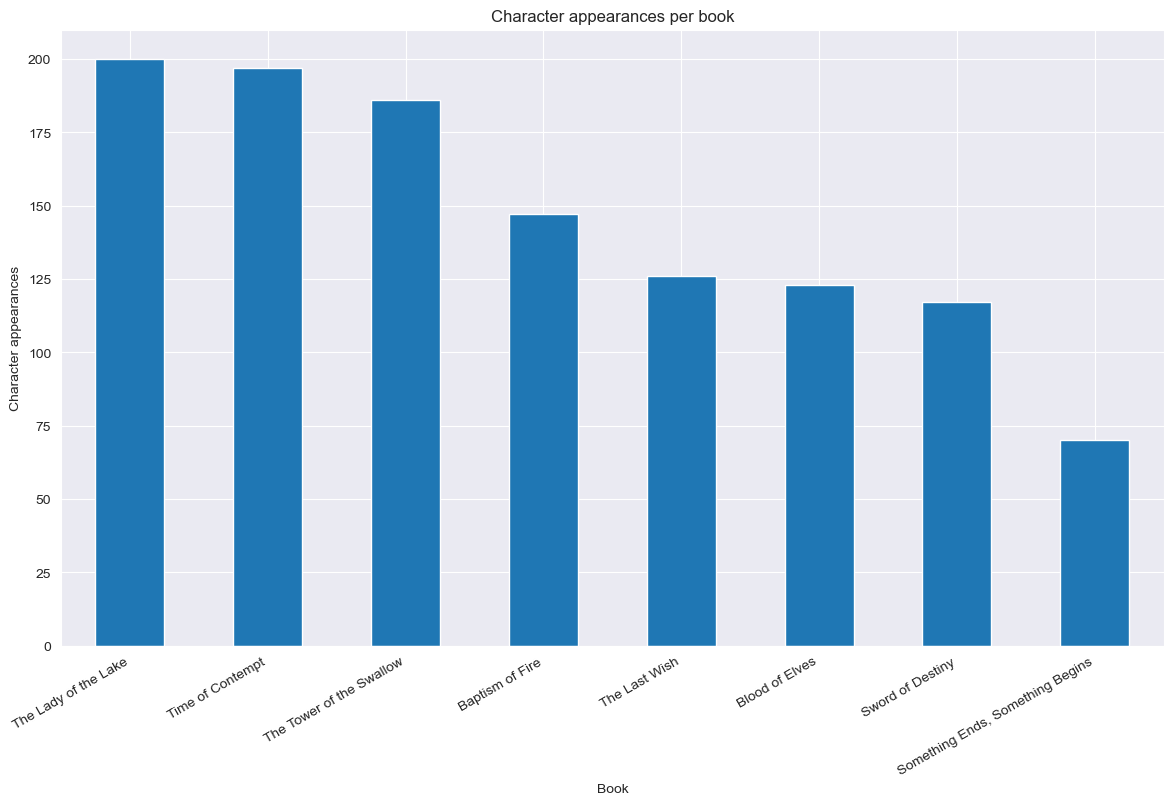

In [40]:
bar_plot_from_column(dataframe=char_apps_df, column="Book", title="Character appearances per book", xlabel="Book",
                     ylabel="Character appearances", rotation=30)

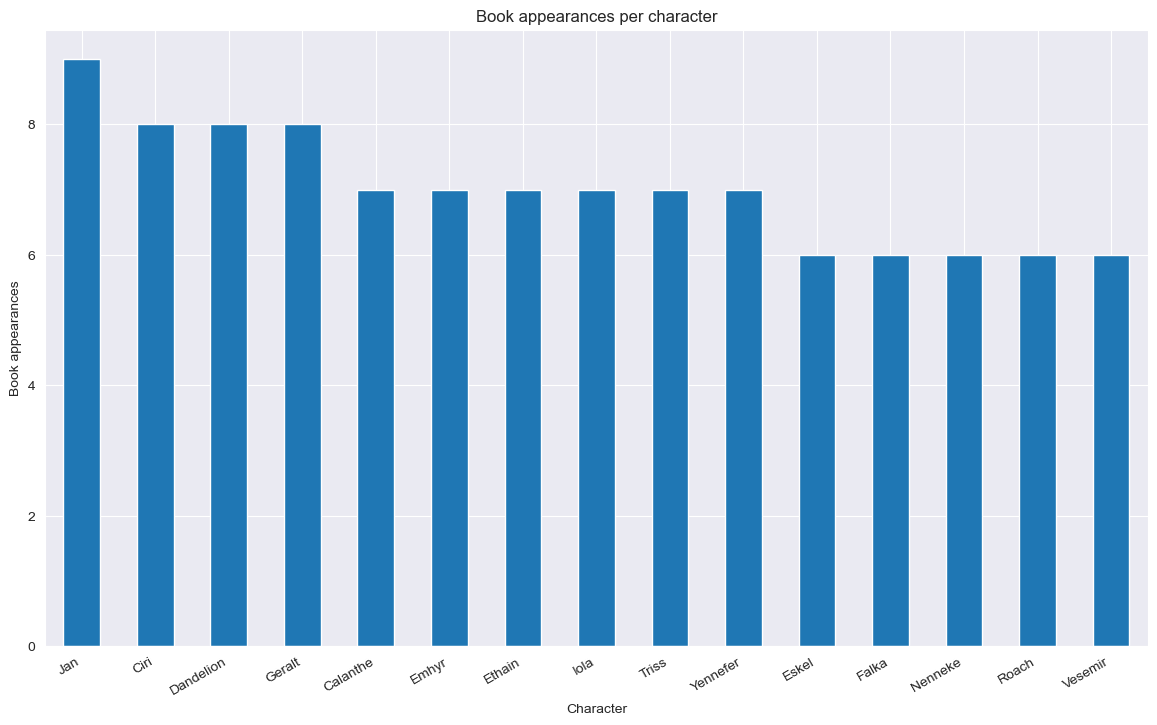

In [41]:
bar_plot_from_grouping(dataframe=char_apps_df, column="Book", grouper="FirstName", nlargest=15,
                       title="Book appearances per character", xlabel="Character", ylabel="Book appearances",
                       rotation=30)

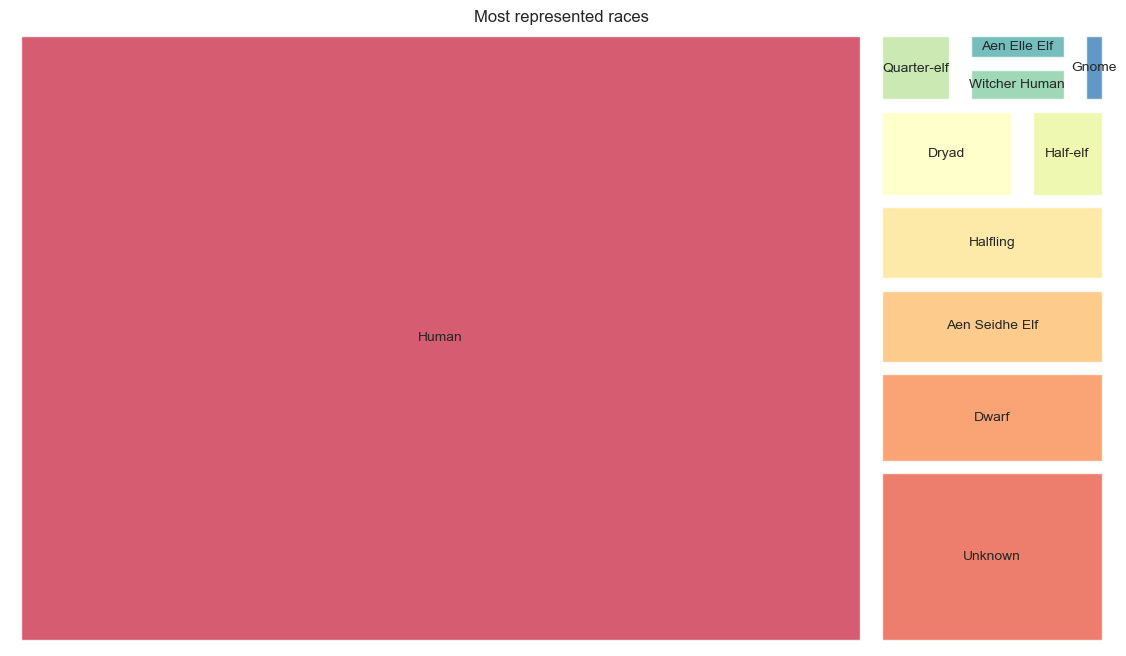

In [42]:
treemap_from_column(chars_df, "Race", "Most represented races", lowest_freq=3)

In [43]:
from ipywidgets import interactive, fixed, widgets

In [44]:
def _relp_weights(sliding_window: int, nlargest: int) -> pd.DataFrame:
    _df = sum_all_relp_weights(sliding_window, nlargest)
    display(_df)
    return _df


slider = widgets.IntSlider(min=20, max=50, value=30, step=5, description="Top nth relationships")
w = interactive(_relp_weights, sliding_window=fixed(25), nlargest=slider)
display(w)

interactive(children=(IntSlider(value=30, description='Top nth relationships', max=50, min=20, step=5), Output…

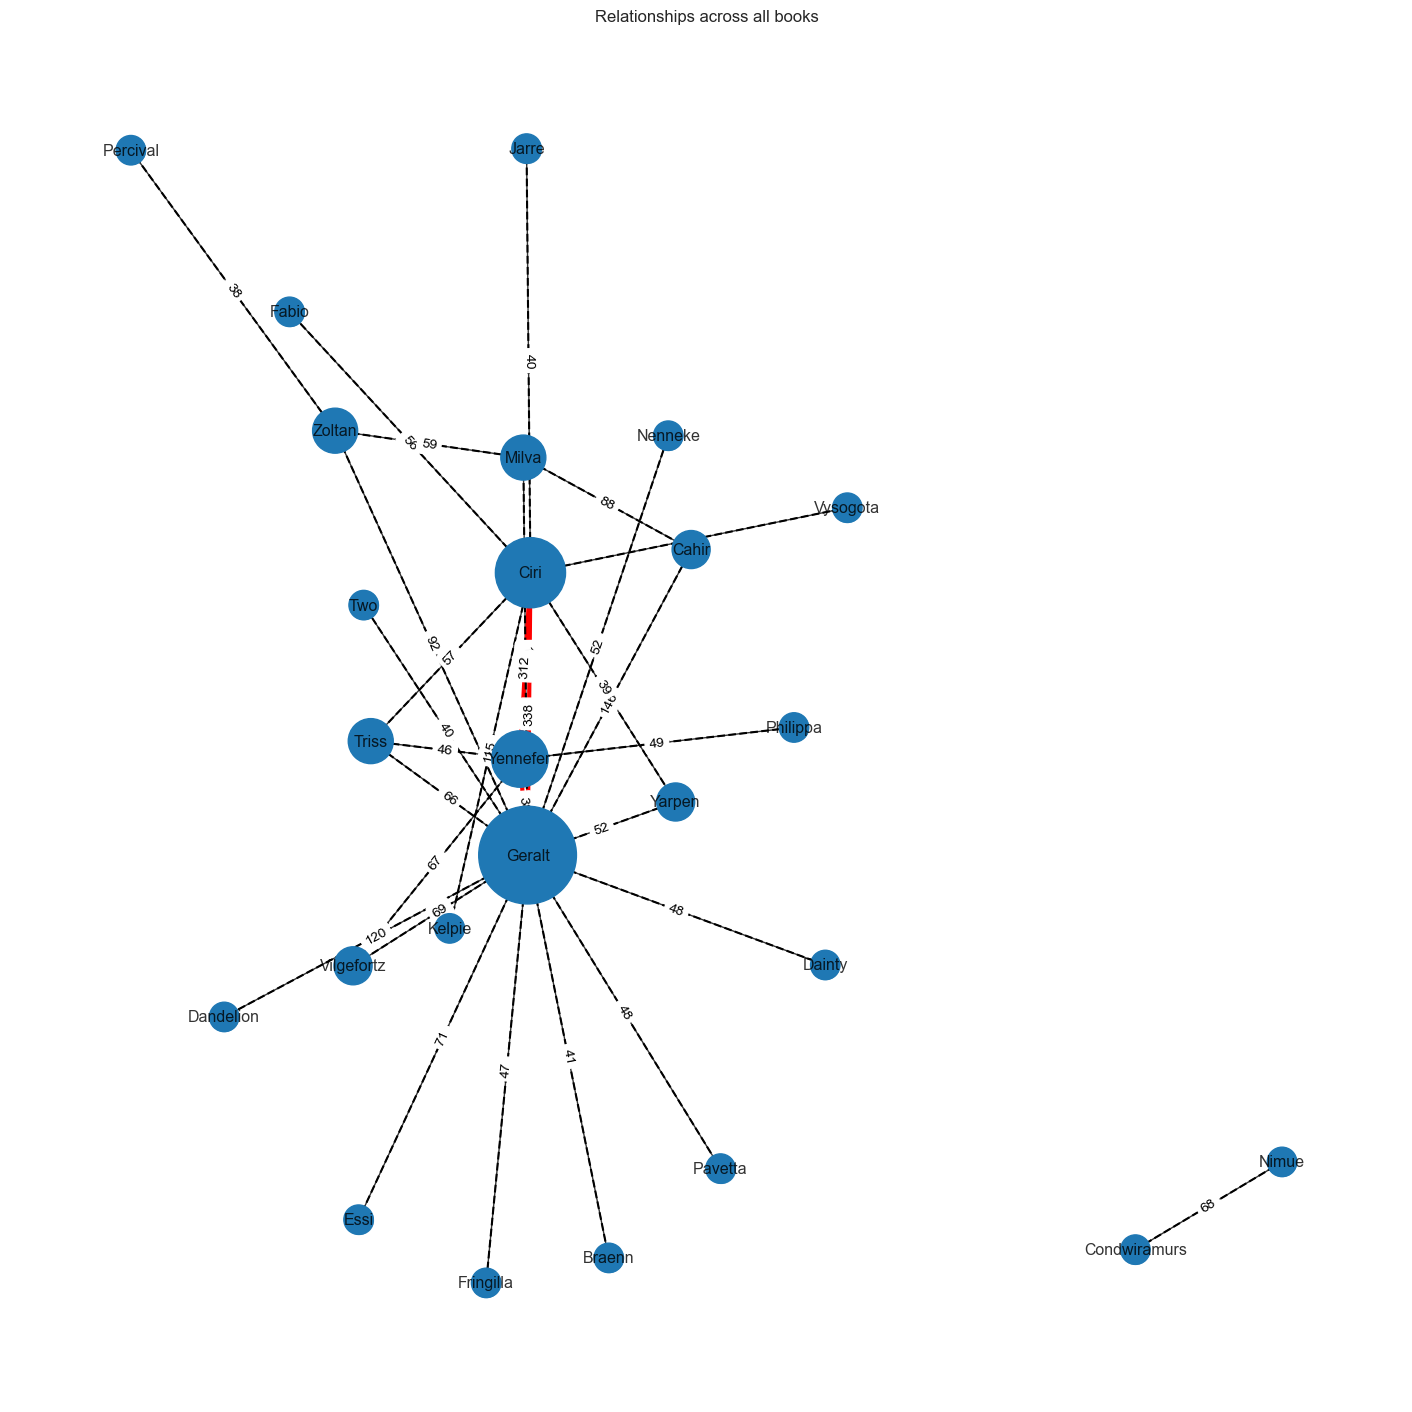

In [45]:
plot_relationship_graph(w.result, "Relationships across all books")

In [46]:
def _relp_weights_in_book(book: str, sliding_window: int, nlargest: int) -> pd.DataFrame:
    _df = sum_relp_weights_in_book(book, sliding_window, nlargest)
    display(_df)
    return _df


slider = widgets.IntSlider(min=20, max=50, value=30, step=5, description="Top nth relationships")
book_box = widgets.Dropdown(options=books_lst, description="Book selection")
w = interactive(_relp_weights_in_book, book=book_box, sliding_window=fixed(25), nlargest=slider)
display(w)

interactive(children=(Dropdown(description='Book selection', options=('The Last Wish', 'The Sword of Destiny',…

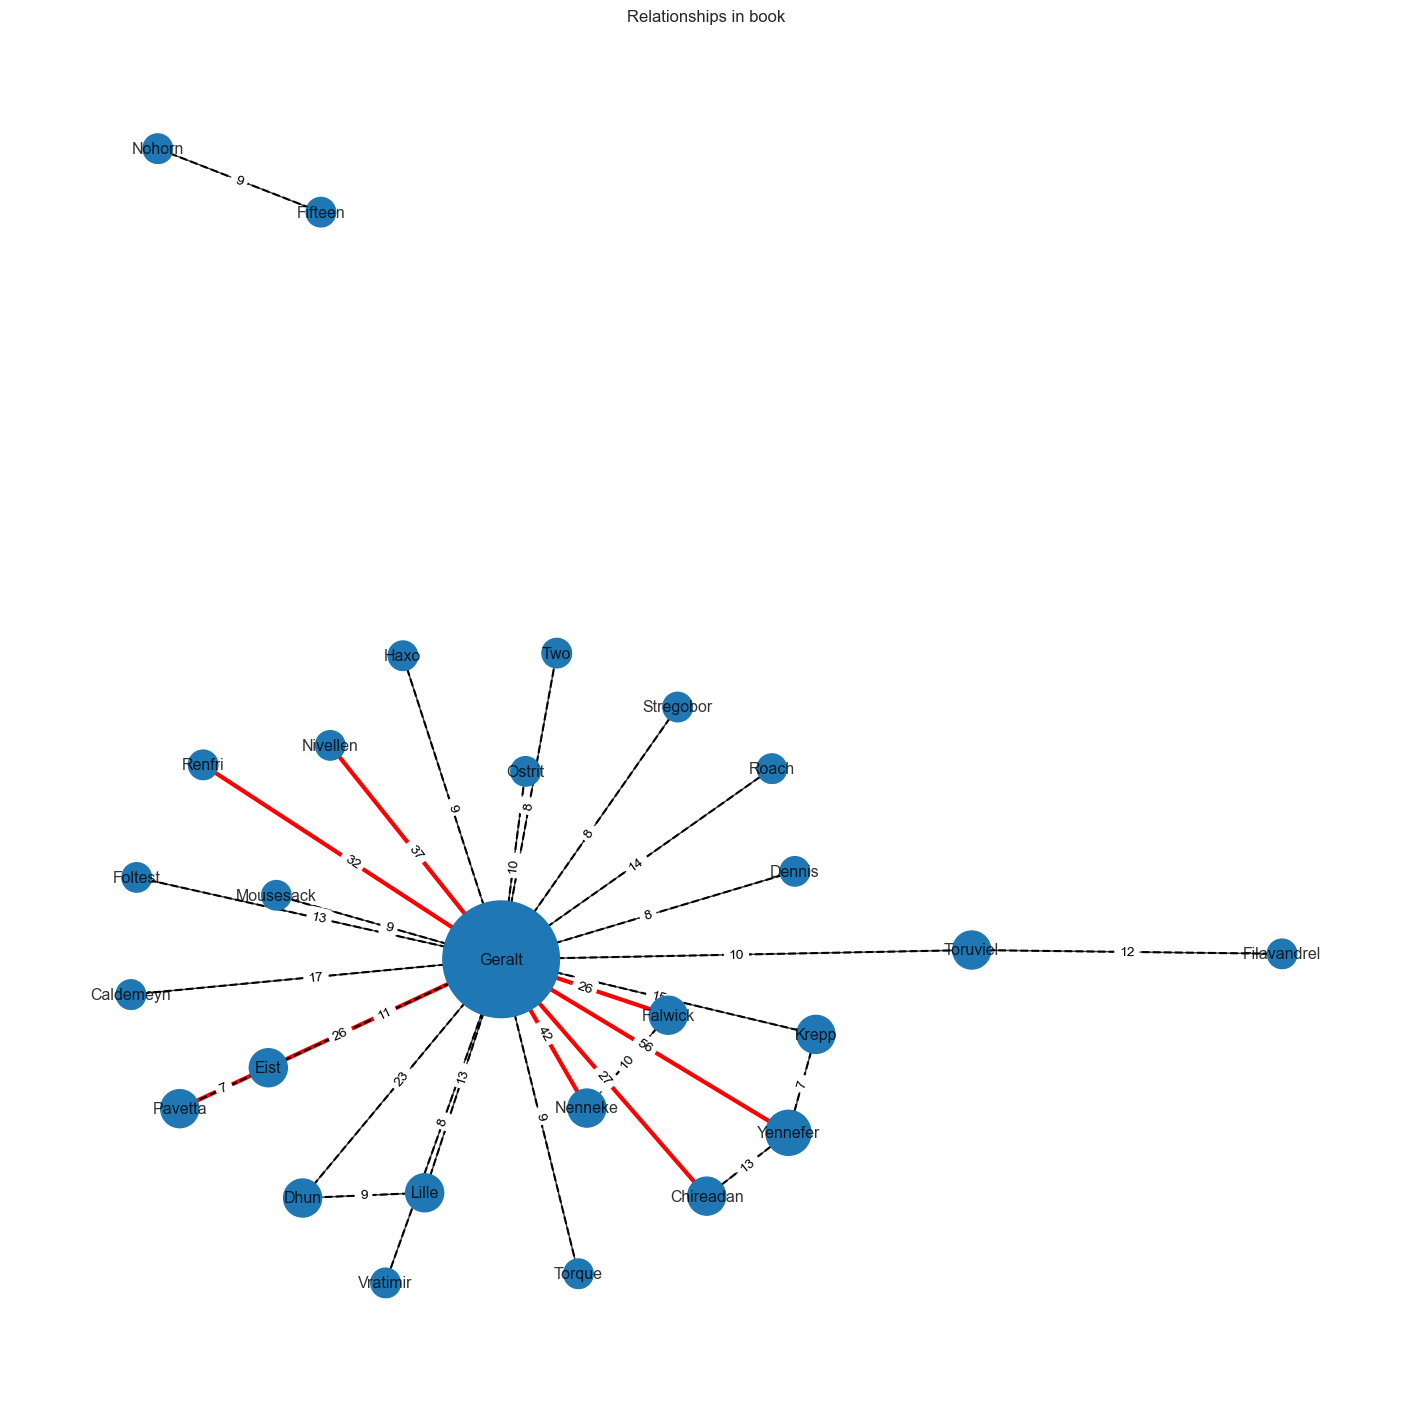

In [47]:
plot_relationship_graph(w.result, "Relationships in book")

In [48]:
columns = OrderedSet(["PrimDyad", "SecDyad", "TerDyad", "QuatDyad", "OppDyad"])


def _emotions_score(first_char: str, second_char: str, book: str, min_distance: int, max_distance: int) -> \
        list[OrderedDict[str, float]]:
    df = join_sents(first_char, second_char, book=book, min_distance=min_distance, max_distance=max_distance)
    display(df)
    emotions_df = measure_emotions_score(df)
    dict_lst = [agg_emotions_score(emotions_df, col) for col in columns]
    return dict_lst


book_box = widgets.Dropdown(options=books_lst, description="Book selection")
chars_box = widgets.Dropdown(options=chars_lst[:8], description="First Character", value="Geralt")
second_char_box = widgets.Dropdown(options=chars_lst[:8], description="Second Character", value="Yennefer")
w = interactive(_emotions_score, first_char=chars_box, second_char=second_char_box, book=book_box,
                min_distance=fixed(4), max_distance=fixed(20))
display(w)

interactive(children=(Dropdown(description='First Character', options=('Geralt', 'Ciri', 'Yennefer', 'Milva', …

<Figure size 750x500 with 0 Axes>

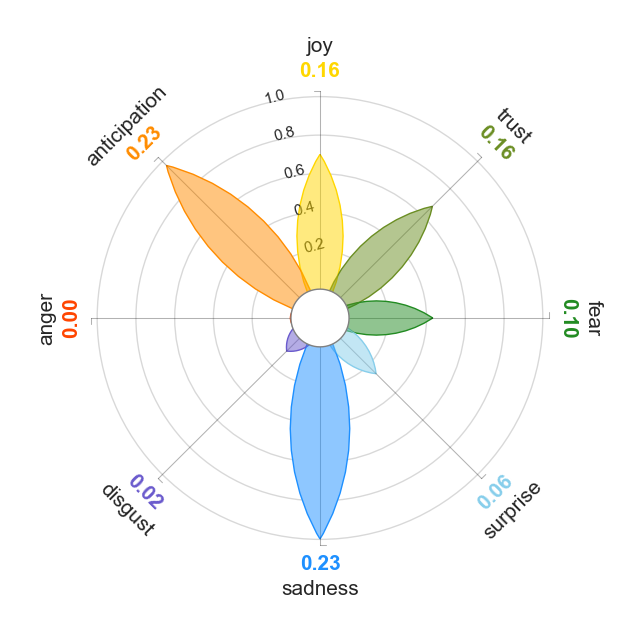

<Figure size 750x500 with 0 Axes>

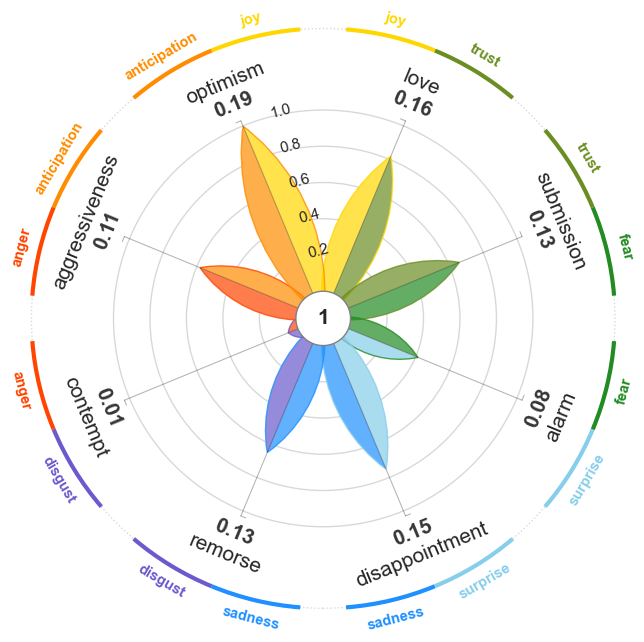

<Figure size 750x500 with 0 Axes>

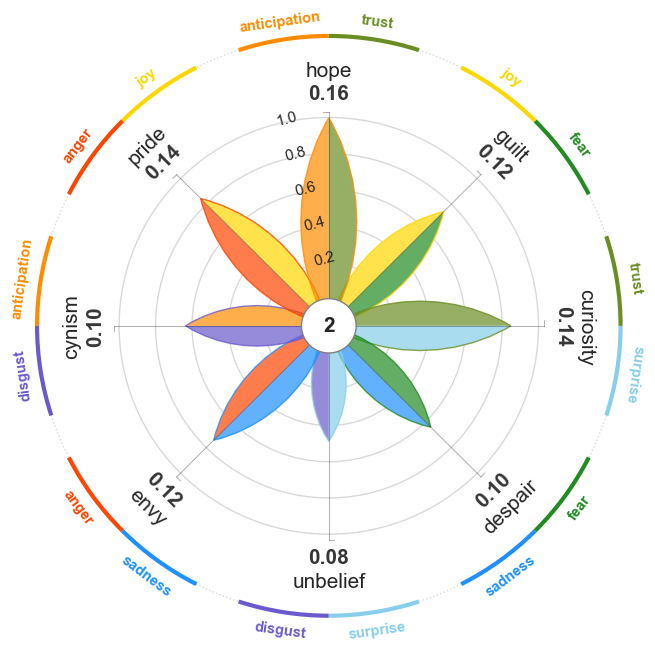

<Figure size 750x500 with 0 Axes>

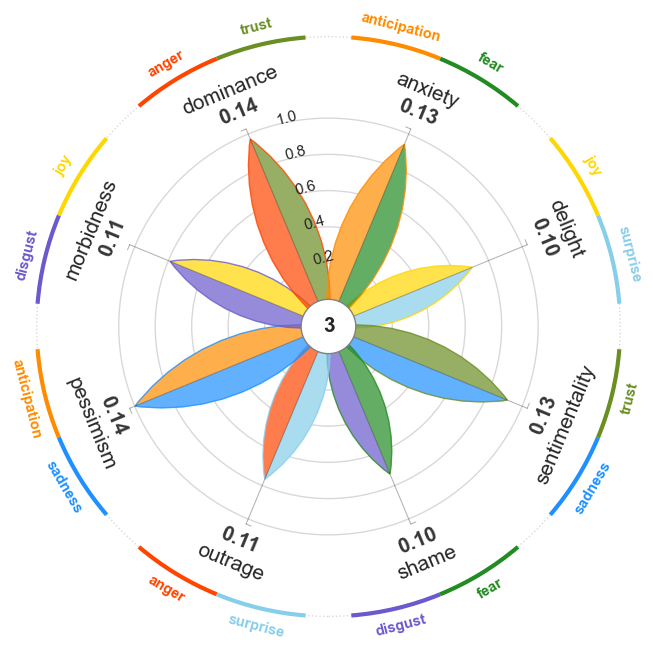

<Figure size 750x500 with 0 Axes>

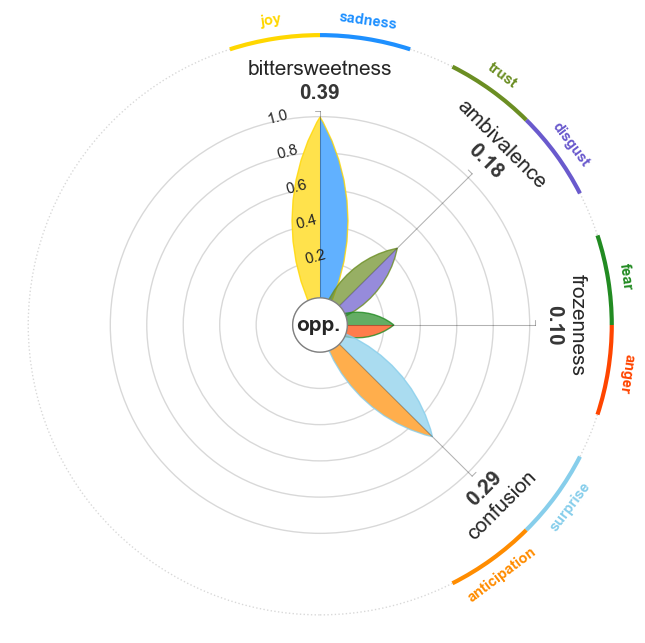

In [49]:
d_lst = w.result
for d in d_lst:
    plot_plutchik(d)

In [50]:
def _genealogical_tree(max_depth: int, char: str) -> tuple[nx.DiGraph, OrderedDict[str, int]]:
    url = chars_df.loc[chars_df["FirstName"] == char].iloc[0]["URL"]
    return build_genealogical_tree(chars_df, url, max_depth)


slider = widgets.IntSlider(min=4, max=10, value=7, step=1, description="Max Depth")
chars_box = widgets.Dropdown(options=chars_lst[:8], description="First Character")
w = interactive(_genealogical_tree, char=chars_box, max_depth=slider)
display(w)

interactive(children=(IntSlider(value=7, description='Max Depth', max=10, min=4), Dropdown(description='First …

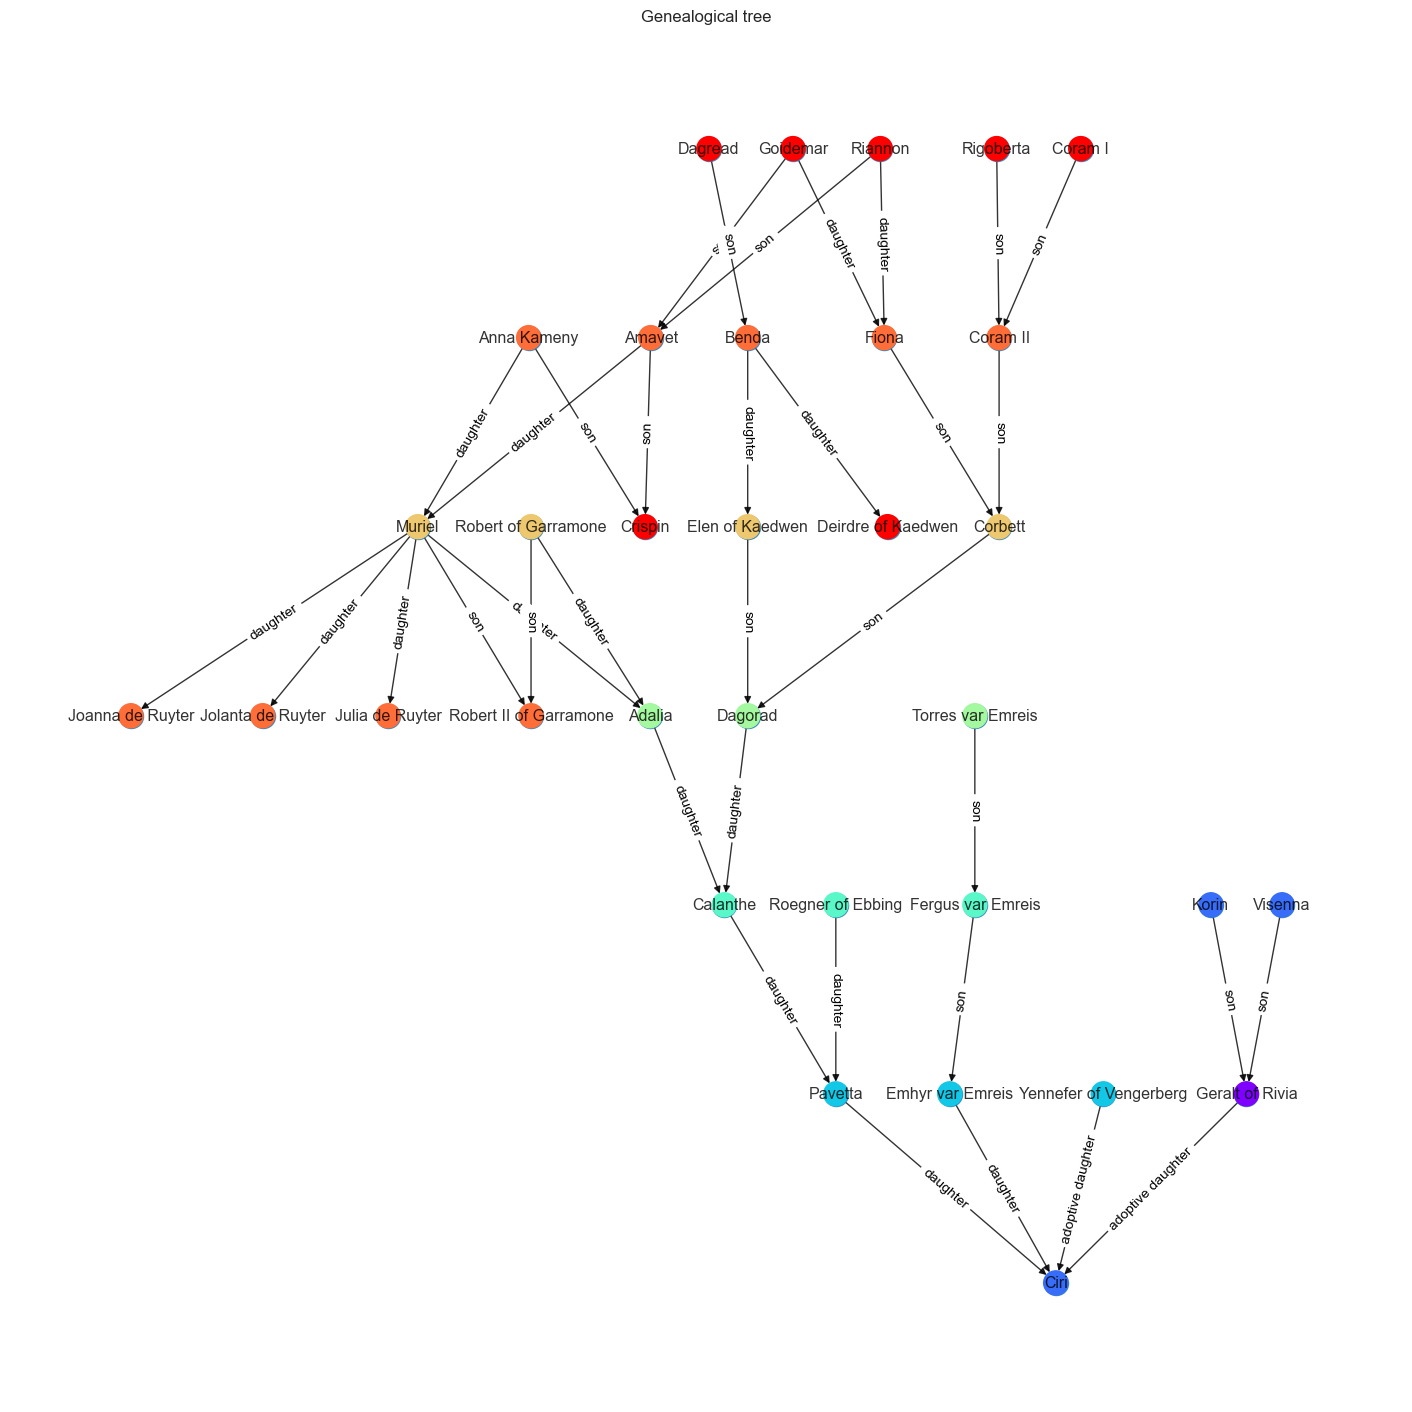

In [51]:
graph, depths_dict = w.result
plot_genealogical_tree(graph, depths_dict, "Genealogical tree")

In [52]:
_df = sum_all_relp_weights(nlargest=60)
g: nx.Graph = nx.from_pandas_edgelist(_df, source="Source", target="Target", edge_attr=True, edge_key="Value")
degree_dict = OrderedDict(sorted(dict(nx.degree_centrality(g)).items(), key=itemgetter(1), reverse=True))
closeness_dict = OrderedDict(sorted(dict(nx.closeness_centrality(g)).items(), key=itemgetter(1), reverse=True))
betweenness_dict = OrderedDict(sorted(dict(nx.betweenness_centrality(g)).items(), key=itemgetter(1), reverse=True))
degree_df = pd.DataFrame.from_dict(degree_dict, orient="index", columns=["Degree"])
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient="index", columns=["Closeness"])
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient="index", columns=["Betweenness"])
display(degree_df, closeness_df, betweenness_df)

,Degree
Geralt,0.586957
Ciri,0.391304
Yennefer,0.195652
Vilgefortz,0.086957
Cahir,0.065217
Milva,0.065217
Zoltan,0.065217
Triss,0.065217
Yarpen,0.065217
Nenneke,0.065217


,Closeness
Geralt,0.678822
Ciri,0.576534
Yennefer,0.513256
Vilgefortz,0.478261
Triss,0.467633
Yarpen,0.467633
Nenneke,0.467633
Cahir,0.457467
Vesemir,0.452548
Philippa,0.420870


,Betweenness
Geralt,0.667150
Ciri,0.413043
Yennefer,0.101449
Zoltan,0.041546
Vilgefortz,0.041546
Philippa,0.041546
Fringilla,0.041546
Jarre,0.041546
Cahir,0.005797
Milva,0.000966
